This script creates all of the standardized and cleaned historical full-term & early-term clickstream predictors.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import glob
import pickle

In [38]:
df = pd.read_stata("~\\Box Sync\\Clickstream\\data\\full\\LMS_data_historical_updated.dta")

In [39]:
df.columns.values

array(['strm', 'college', 'course', 'section', 'vccsid', 'grade',
       'assign_sub_cnt', 'avg_depth_post', 'avg_session_len',
       'avg_word_tot', 'disc_post_cnt', 'disc_reply_cnt',
       'irreg_session_len', 'tot_act_day_cnt', 'tot_act_wk_cnt',
       'tot_click_cnt', 'tot_session_cnt', 'tot_time',
       'on_time_assign_share', 'has_on_time_assign_share',
       'has_assign_sub_cnt'], dtype=object)

In [40]:
# df.cum_act_day_cnt_qrt2.hist()
# plt.show()
# df.cum_act_day_cnt_qrt2.apply(lambda x: np.log(x+1)).hist()
# plt.show()

In [41]:
# df.cum_act_day_cnt_qrt3.hist()
# plt.show()
# df.cum_act_day_cnt_qrt3.apply(lambda x: np.log(x+1)).hist()
# plt.show()

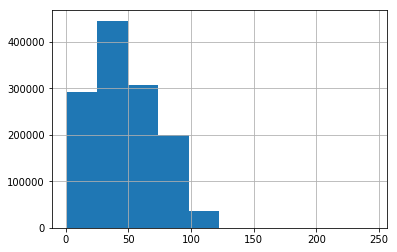

In [42]:
df.tot_act_day_cnt.hist()
plt.show()

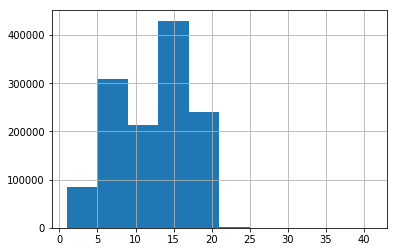

In [43]:
df.tot_act_wk_cnt.hist()
plt.show()

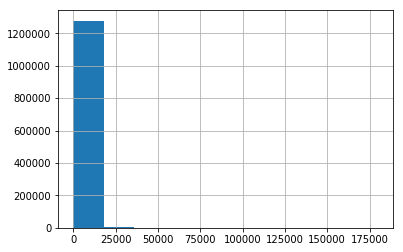

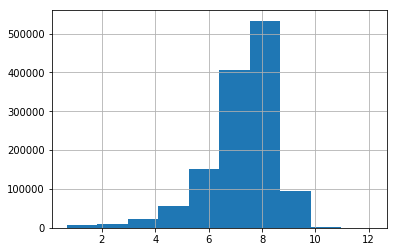

In [44]:
df.tot_click_cnt.hist()
plt.show()
df.tot_click_cnt.apply(lambda x: np.log(x+1)).hist()
plt.show()

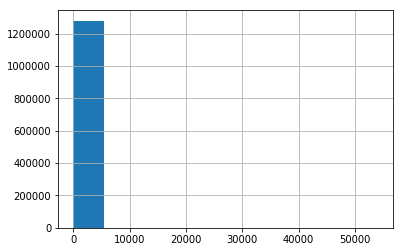

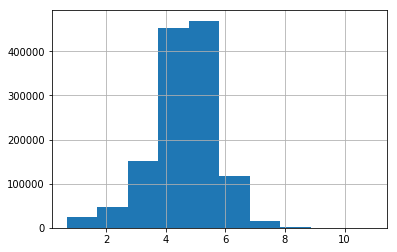

In [45]:
df.tot_session_cnt.hist()
plt.show()
df.tot_session_cnt.apply(lambda x: np.log(x+1)).hist()
plt.show()

In [46]:
# df.session_cnt_halfterm.hist()
# plt.show()
# df.session_cnt_halfterm.apply(lambda x: np.log(x+1)).hist()
# plt.show()

In [47]:
# df.avg_click_cnt_per_session.hist()
# plt.show()
# df.avg_click_cnt_per_session.apply(lambda x: np.log(x+1)).hist()
# plt.show()

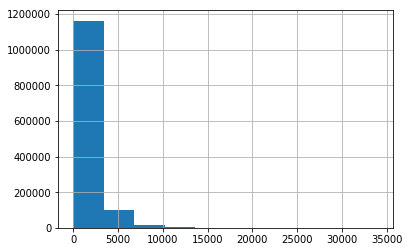

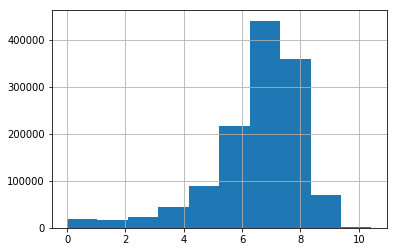

In [48]:
df.tot_time.hist()
plt.show()
df.tot_time.apply(lambda x: np.log(x+1)).hist()
plt.show()

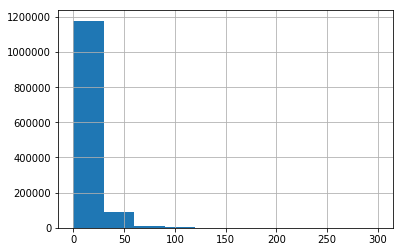

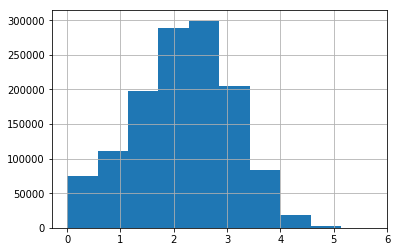

In [49]:
df.avg_session_len.hist()
plt.show()
df.avg_session_len.apply(lambda x: np.log(x+1)).hist()
plt.show()

In [50]:
# df.avg_time_per_day.hist()
# plt.show()
# df.avg_time_per_day.apply(lambda x: np.log(x+1)).hist()
# plt.show()

In [51]:
# df.time_until_first_act.hist()
# plt.show()
# df.time_until_first_act.apply(lambda x: np.log(x+1)).hist()
# plt.show()

In [52]:
# df.longest_inact.hist()
# plt.show()
# df.longest_inact.apply(lambda x: np.log(x+1)).hist()
# plt.show()

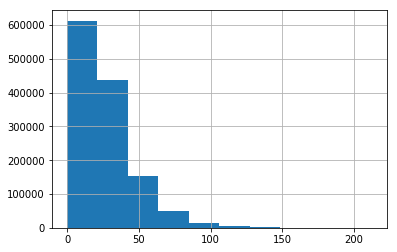

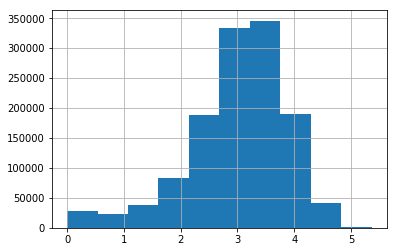

In [53]:
df.irreg_session_len.hist()
plt.show()
df.irreg_session_len.apply(lambda x: np.log(x+1)).hist()
plt.show()

In [54]:
# df.irreg_session_gap.hist()
# plt.show()
# df.irreg_session_gap.apply(lambda x: np.log(x+1)).hist()
# plt.show()

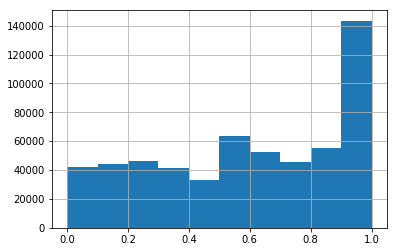

In [55]:
df[df.has_on_time_assign_share == 1].on_time_assign_share.hist()
plt.show()

In [56]:
# df[df.has_assign_sub_cnt_day == 1].assign_sub_cnt_day.hist()
# plt.show()
# df[df.has_assign_sub_cnt_day == 1].assign_sub_cnt_day.apply(lambda x: np.log(x+1)).hist()
# plt.show()

In [57]:
# df[df.has_assign_sub_cnt_pm == 1].assign_sub_cnt_pm.hist()
# plt.show()
# df[df.has_assign_sub_cnt_pm == 1].assign_sub_cnt_pm.apply(lambda x: np.log(x+1)).hist()
# plt.show()

In [58]:
# df[df.has_assign_sub_cnt_am == 1].assign_sub_cnt_am.hist()
# plt.show()
# df[df.has_assign_sub_cnt_am == 1].assign_sub_cnt_am.apply(lambda x: np.log(x+1)).hist()
# plt.show()

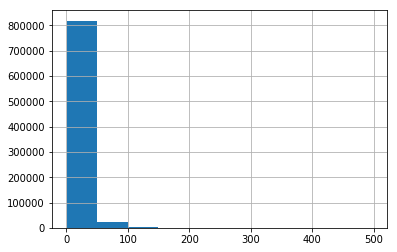

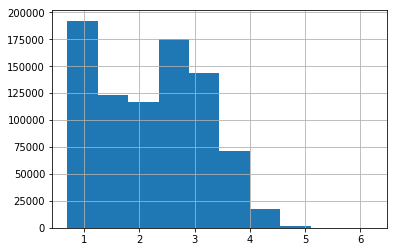

In [59]:
df[df.has_assign_sub_cnt == 1].assign_sub_cnt.hist()
plt.show()
df[df.has_assign_sub_cnt == 1].assign_sub_cnt.apply(lambda x: np.log(x+1)).hist()
plt.show()

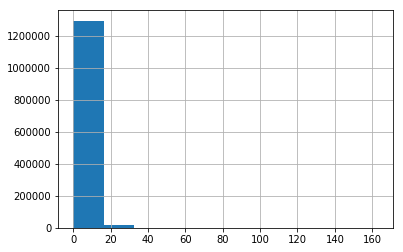

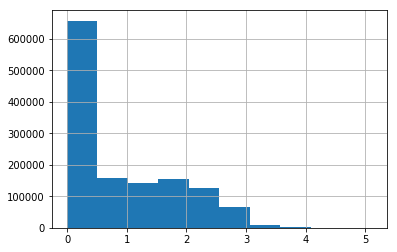

In [60]:
df.disc_post_cnt.hist()
plt.show()
df.disc_post_cnt.apply(lambda x: np.log(x+1)).hist()
plt.show()

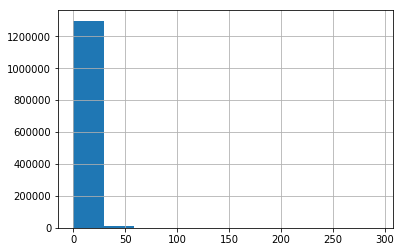

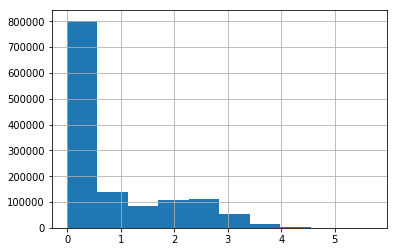

In [61]:
df.disc_reply_cnt.hist()
plt.show()
df.disc_reply_cnt.apply(lambda x: np.log(x+1)).hist()
plt.show()

In [62]:
# df.avg_word_post.hist()
# plt.show()

In [63]:
# df.avg_word_reply.hist()
# plt.show()

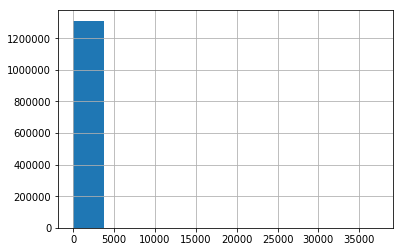

In [64]:
df.avg_word_tot.hist()
plt.show()

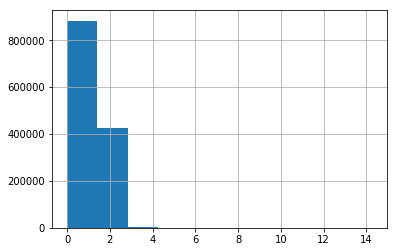

In [65]:
df.avg_depth_post.hist()
plt.show()

In [66]:
# log_list = ['cum_act_day_cnt_qrt2', 'cum_act_day_cnt_qrt3',
#             'tot_click_cnt', 'avg_click_cnt_per_session', 'tot_time',
#             'avg_session_len', 'avg_time_per_day', 
#             'time_until_first_act', 'longest_inact',
#             'tot_session_cnt', 'session_cnt_halfterm',
#             'irreg_session_len', 'irreg_session_gap',
#             'disc_post_cnt', 'disc_reply_cnt', 
#             'assign_sub_cnt_am', 'assign_sub_cnt_pm', 'assign_sub_cnt_day']
log_list = ['tot_click_cnt', 'tot_time',
            'avg_session_len',
            'tot_session_cnt',
            'irreg_session_len',
            'disc_post_cnt', 'disc_reply_cnt',
            'assign_sub_cnt']
for v in log_list:
    df.loc[:,v] = df.loc[:,v].apply(lambda x: np.log(x+1))

In [67]:
# std_list = ['cum_act_day_cnt_qrt2', 'cum_act_day_cnt_qrt3',
#             'tot_click_cnt', 'avg_click_cnt_per_session', 'tot_time',
#             'avg_session_len', 'avg_time_per_day',
#             'time_until_first_act', 'longest_inact',
#             'tot_session_cnt', 'session_cnt_halfterm',
#             'irreg_session_len', 'irreg_session_gap',
#             'tot_act_day_cnt', 'tot_act_wk_cnt',
#             'disc_post_cnt', 'disc_reply_cnt',
#             'avg_word_post', 'avg_word_reply','avg_depth_post']
std_list = ['tot_click_cnt', 'tot_time',
            'avg_session_len',
            'tot_session_cnt',
            'irreg_session_len',
            'tot_act_day_cnt', 'tot_act_wk_cnt',
            'disc_post_cnt', 'disc_reply_cnt',
            'avg_word_tot', 'avg_depth_post']
all_pairs = df.loc[:,['strm', 'college', 'course', 'section']].drop_duplicates()
all_pairs.shape

(69897, 4)

In [68]:
df.to_stata("~\\Box Sync\\Clickstream\\data\\full\\LMS_data_historical_not_standardized.dta", write_index=False)

In [69]:
# df_sub_list = []
# for i in range(all_pairs.shape[0]):
#     print(i)
#     r = all_pairs.iloc[i:(i+1), :]
#     df_sub = r.merge(df, on = ['strm', 'course', 'section'], how='inner')
#     n0 = df_sub.shape[0]
#     scaler = StandardScaler()
#     new_1 = scaler.fit_transform(df_sub.loc[:,std_list])
#     for j,var in enumerate(std_list):
#         df_sub.loc[:,var] = new_1[:,j]
#     for var in ['on_time_assign_share', 'assign_sub_cnt_am', 'assign_sub_cnt_pm', 'assign_sub_cnt_day']:
#         new_2 = df_sub[df_sub['has_' + var] == 1].loc[:,['strm', 'course', 'section', 'vccsid', 'has_' + var, var]]
#         if new_2.shape[0] == 0:
#             pass
#         else:
#             new_3 = df_sub[df_sub['has_' + var] == 0].loc[:,['strm', 'course', 'section', 'vccsid', 'has_' + var, var]]
#             scaler = StandardScaler()
#             new_2.loc[:,var] = scaler.fit_transform(new_2.loc[:,[var]])[:,0]
#             new_23 = pd.concat([new_2, new_3])
#             df_sub = df_sub.drop(['has_' + var, var], axis=1)
#             df_sub = df_sub.merge(new_23, on=['strm', 'course', 'section','vccsid'], how='inner')
#         assert df_sub.shape[0] == n0
#     df_sub_list.append(df_sub.copy())
# df_new = pd.concat(df_sub_list)

Run the script <b>"parallelized_standardization_of_full_clickstream.py"</b> before the next cell

In [70]:
df_sub_list = []
for fp in glob.glob("~\\Box Sync\\Clickstream\\data\\full\\standardized_full\\*.csv"):
    df_sub_list.append(pd.read_csv(fp))
df_new = pd.concat(df_sub_list)
df_new.loc[:,'section'] = df_new.section.apply(lambda x: x[3:])

C:\Users\ys8mz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [71]:
assert df_new.shape == df.shape

In [74]:
df_new.loc[:,'grade'] = df_new.grade.apply(lambda x: "" if pd.isnull(x) else x)

In [75]:
pd.isnull(df_new).any()

assign_sub_cnt              False
avg_depth_post              False
avg_session_len              True
avg_word_tot                False
college                     False
course                      False
disc_post_cnt               False
disc_reply_cnt              False
grade                       False
has_assign_sub_cnt          False
has_on_time_assign_share    False
irreg_session_len            True
on_time_assign_share        False
section                     False
strm                        False
tot_act_day_cnt              True
tot_act_wk_cnt               True
tot_click_cnt                True
tot_session_cnt              True
tot_time                     True
vccsid                      False
dtype: bool

In [76]:
df_new.describe()

,assign_sub_cnt,avg_depth_post,avg_session_len,avg_word_tot,disc_post_cnt,disc_reply_cnt,has_assign_sub_cnt,has_on_time_assign_share,irreg_session_len,on_time_assign_share,strm,tot_act_day_cnt,tot_act_wk_cnt,tot_click_cnt,tot_session_cnt,tot_time
count,1.313331e+06,1.313331e+06,1.279927e+06,1.313331e+06,1.313331e+06,1.313331e+06,1.313331e+06,1.313331e+06,1.271660e+06,1.313331e+06,1.313331e+06,1.279927e+06,1.279927e+06,1.279927e+06,1.279927e+06,1.279927e+06
mean,1.066220e-02,-3.654829e-05,-1.053097e-18,1.756128e-18,1.554825e-03,3.883256e-05,6.409633e-01,4.319223e-01,1.265748e-18,-2.595813e-18,2.202214e+03,-5.509796e-19,-1.031664e-17,-1.073959e-17,7.812946e-06,-4.702236e-19
std,7.528361e-01,7.635681e-01,9.993103e-01,7.667857e-01,7.627584e-01,7.323459e-01,4.797182e-01,4.953439e-01,9.994297e-01,6.377451e-01,7.161658e+00,9.977141e-01,9.814905e-01,9.993216e-01,9.992039e-01,9.993111e-01
min,-8.717798e+00,-9.477659e+00,-5.348819e+00,-5.800543e+00,-7.847752e+00,-8.456627e+00,0.000000e+00,0.000000e+00,-5.165637e+00,-7.280110e+00,2.193000e+03,-7.000000e+00,-9.487979e+00,-6.336318e+00,-5.227777e+00,-6.216815e+00
25%,-1.150436e-02,-1.328372e-02,-6.922954e-01,-2.714395e-01,0.000000e+00,-3.383015e-02,0.000000e+00,0.000000e+00,-6.577370e-01,0.000000e+00,2.194000e+03,-7.259284e-01,-1.793380e-02,-5.105381e-01,-6.219269e-01,-5.571626e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.508520e-02,0.000000e+00,2.204000e+03,3.201742e-02,3.528742e-01,1.338166e-01,3.977255e-02,1.100414e-01
75%,2.132007e-01,2.335617e-01,6.978512e-01,2.247987e-02,3.643254e-01,1.827376e-01,1.000000e+00,1.000000e+00,6.911630e-01,0.000000e+00,2.212000e+03,7.536443e-01,5.262014e-01,6.373541e-01,6.605033e-01,6.648098e-01
max,9.746794e+00,9.165151e+00,4.969348e+00,9.165151e+00,9.165151e+00,9.055385e+00,1.000000e+00,1.000000e+00,4.639824e+00,8.602325e+00,2.212000e+03,5.348446e+00,7.000000e+00,6.037332e+00,6.822146e+00,4.128306e+00


In [77]:
df_new = df_new.fillna(0)

In [78]:
df2 = pd.read_stata("~\\Box Sync\\Clickstream\\data\\full\\LMS_data_final.dta").loc[:,['strm','vccsid']].drop_duplicates()

In [79]:
for v in ['college','course','section','vccsid']:
    df_new.loc[:,v] = df_new.loc[:,v].astype(str)
    if v == "vccsid":
        df2.loc[:,v] = df2.loc[:v].astype(str)
df_new.loc[:,'strm'] = df_new.loc[:,'strm'].astype(str).astype(int)
df2.loc[:,'strm'] = df2.loc[:,'strm'].astype(str).astype(int)

In [80]:
df2 = df2.rename(columns={'strm':'target_strm'})
all_target_pairs = [(df2.vccsid.iloc[indx], df2.target_strm.iloc[indx]) for indx in range(df2.shape[0])]
len(all_target_pairs)

356863

In [82]:
predictor_1 = [e for e in df_new.columns.values if e not in {'vccsid', 'strm', 'college', 'course', 'section', 'grade'} and e.startswith("has_") == False and e.startswith("assign_sub_cnt") == False and e != "on_time_assign_share"]
predictor_2 = [e for e in df_new.columns.values if e.startswith("assign_sub_cnt") or e == "on_time_assign_share"]
pickle.dump(predictor_1, open("~\\Box Sync\\Clickstream\\data\\full\\historical_1\\predictor_1.p", "wb"))
pickle.dump(predictor_2, open("~\\Box Sync\\Clickstream\\data\\full\\historical_1\\predictor_2.p", "wb"))

In [83]:
vccsid_sets = []
l = list(np.unique(df2.vccsid))
n = len(l) // 100 + 1
for i in range(100):
    vccsid_sets.append(l[(n*i):(n*(i+1))])

In [84]:
for i,ll in enumerate(vccsid_sets):
    print(i)
    ll_series = pd.DataFrame({'vccsid':ll})
    df_new_part = ll_series.merge(df_new, how='inner', on=['vccsid'])
    df2_part = ll_series.merge(df2, how='inner', on=['vccsid'])
    print(df_new_part.shape[0], df2_part.shape[0])
    df_new_part.to_stata("~\\Box Sync\\Clickstream\\data\\full\\df_new_part{}.dta".format(i),
                         write_index=False)
    df2_part.to_stata("~\\Box Sync\\Clickstream\\data\\full\\df2_part{}.dta".format(i),
                      write_index=False)
    print("")

0
11292 3572

1
11035 3551

2
11406 3640

3
11257 3509

4
12072 3381

5
9892 3613

6
10826 3632

7
11143 3584

8
11182 3528

9
11242 3580

10
12403 3330

11
9785 3632

12
10106 3546

13
11557 3630

14
11325 3621

15
11029 3595

16
12776 3406

17
10381 3727

18
10622 3610

19
10920 3447

20
11077 3527

21
11072 3557

22
13169 3422

23
10012 3605

24
10108 3636

25
11547 3626

26
11338 3595

27
11336 3562

28
11722 3470

29
11770 3557

30
10242 3773

31
10751 3495

32
11092 3534

33
10533 3485

34
11136 3577

35
12346 3391

36
9941 3662

37
10249 3520

38
10983 3528

39
11006 3534

40
11163 3528

41
12776 3418

42
10246 3754

43
10722 3731

44
11180 3579

45
11112 3620

46
10657 3455

47
12599 3444

48
10617 3589

49
10415 3701

50
11092 3522

51
11056 3536

52
11466 3608

53
11687 3585

54
11743 3501

55
10087 3665

56
10755 3521

57
11392 3647

58
11189 3544

59
11316 3605

60
12374 3391

61
10013 3685

62
13521 3320

63
15625 3029

64
15444 2959

65
15829 3030

66
15572 2998

67
15675

In [85]:
# historical_predictor_values = {}
# for i,t in enumerate(all_target_pairs):
#     print(i)
#     df_sub = df_new[df_new.vccsid == t[0]]
#     df_sub = df_sub[df_sub.strm < t[1]]
#     if df_sub.shape[0] > 0:
#         df_sub_1 = df_sub.loc[:,predictor_1].mean()
#         new_d = {a:b for a,b in zip(list(df_sub_1.index), list(df_sub_1))}
#         for p in predictor_2:
#             df_sub_2 = df_sub[df_sub['has_'+p] == 1]
#             if df_sub_2.shape[0] == 0:
#                 new_d['has_'+p] = 0
#                 new_d[p] = 0
#             else:
#                 new_d['has_'+p] = 1
#                 new_d[p] = np.mean(df_sub_2[p])
#         historical_predictor_values[t[0]+"-"+str(t[1])] = new_d.copy()

Run the script <b>"parallelized_historical_1.py"</b> before the next cell

In [88]:
historical_predictor_values = {}
for fn in glob.glob("~\\Box Sync\\Clickstream\\data\\full\\historical_1\\part*.p"):
    d = pickle.load(open(fn, "rb"))
    historical_predictor_values = {**historical_predictor_values, **d}

In [89]:
historical_df_1 = pd.DataFrame.from_dict(historical_predictor_values, orient='index').reset_index()
historical_df_1.loc[:,'vccsid'] = historical_df_1.loc[:,'index'].apply(lambda x: x.split("-")[0])
historical_df_1.loc[:,'strm'] = historical_df_1.loc[:,'index'].apply(lambda x: x.split("-")[1]).astype(int)
historical_df_1 = historical_df_1.drop(['index'], axis=1)
historical_df_1.loc[:,'has_full'] = 1
new_colnames = {cn:("prior_" + cn) for cn in historical_df_1.columns.values if cn not in {'vccsid', 'strm'}}
historical_df_1 = historical_df_1.rename(columns = new_colnames)

In [86]:
df3 = pd.read_stata("~\\Box Sync\\Clickstream\\data\\full\\LMS_data_standardized.dta")
df3.shape

(1313331, 27)

In [92]:
to_keep = [e for e in df3.columns.values if e.endswith("1c") == False and e != "has_concurrent_qtr1"]
df3 = df3.loc[:,to_keep]

In [93]:
predictor_3 = [e for e in df3.columns.values if e not in {'vccsid', 'strm', 'course', 'section', 'grade'} and e.startswith("has_") == False and e.startswith("assign_sub_cnt") == False and e != "on_time_assign_share_qtr1"]
predictor_4 = [e for e in df3.columns.values if e.startswith("assign_sub_cnt") or e == "on_time_assign_share_qtr1"]
pickle.dump(predictor_3, open("~\\Box Sync\\Clickstream\\data\\full\\historical_2\\predictor_3.p", "wb"))
pickle.dump(predictor_4, open("~\\Box Sync\\Clickstream\\data\\full\\historical_2\\predictor_4.p", "wb"))

In [94]:
for i,ll in enumerate(vccsid_sets):
    print(i)
    ll_series = pd.DataFrame({'vccsid':ll})
    df3_part = ll_series.merge(df3, how='inner', on=['vccsid'])
    df2_part = ll_series.merge(df2, how='inner', on=['vccsid'])
    print(df3_part.shape[0], df2_part.shape[0])
    df3_part.to_stata("~\\Box Sync\\Clickstream\\data\\full\\historical_2\\df3_part{}.dta".format(i),
                      write_index=False)
    df2_part.to_stata("~\\Box Sync\\Clickstream\\data\\full\\historical_2\\df2_part{}.dta".format(i),
                      write_index=False)
    print("")

0
11292 3572

1
11035 3551

2
11406 3640

3
11257 3509

4
12072 3381

5
9892 3613

6
10826 3632

7
11143 3584

8
11182 3528

9
11242 3580

10
12403 3330

11
9785 3632

12
10106 3546

13
11557 3630

14
11325 3621

15
11029 3595

16
12776 3406

17
10381 3727

18
10622 3610

19
10920 3447

20
11077 3527

21
11072 3557

22
13169 3422

23
10012 3605

24
10108 3636

25
11547 3626

26
11338 3595

27
11336 3562

28
11722 3470

29
11770 3557

30
10242 3773

31
10751 3495

32
11092 3534

33
10533 3485

34
11136 3577

35
12346 3391

36
9941 3662

37
10249 3520

38
10983 3528

39
11006 3534

40
11163 3528

41
12776 3418

42
10246 3754

43
10722 3731

44
11180 3579

45
11112 3620

46
10657 3455

47
12599 3444

48
10617 3589

49
10415 3701

50
11092 3522

51
11056 3536

52
11466 3608

53
11687 3585

54
11743 3501

55
10087 3665

56
10755 3521

57
11392 3647

58
11189 3544

59
11316 3605

60
12374 3391

61
10013 3685

62
13521 3320

63
15625 3029

64
15444 2959

65
15829 3030

66
15572 2998

67
15675

In [95]:
# historical_predictor_values_2 = {}
# for i,t in enumerate(all_target_pairs):
#     print(i)
#     df_sub = df3[df3.vccsid == t[0]]
#     df_sub = df_sub[df_sub.strm < t[1]]
#     if df_sub.shape[0] > 0:
#         df_sub_1 = df_sub.loc[:,predictor_3].mean()
#         new_d = {a:b for a,b in zip(list(df_sub_1.index), list(df_sub_1))}
#         for p in predictor_4:
#             df_sub_2 = df_sub[df_sub['has_'+p] == 1]
#             if df_sub_2.shape[0] == 0:
#                 new_d['has_'+p] = 0
#                 new_d[p] = 0
#             else:
#                 new_d['has_'+p] = 1
#                 new_d[p] = np.mean(df_sub_2[p])
#         historical_predictor_values_2[t[0]+"-"+str(t[1])] = new_d.copy()

Run the script <b>"parallelized_historical_2.py"</b> before the next cell

In [96]:
historical_predictor_values_2 = {}
for fn in glob.glob("~\\Box Sync\\Clickstream\\data\\full\\historical_2\\part*.p"):
    d = pickle.load(open(fn, "rb"))
    historical_predictor_values_2 = {**historical_predictor_values_2, **d}

In [97]:
historical_df_2 = pd.DataFrame.from_dict(historical_predictor_values_2, orient='index').reset_index()
historical_df_2.loc[:,'vccsid'] = historical_df_2.loc[:,'index'].apply(lambda x: x.split("-")[0])
historical_df_2.loc[:,'strm'] = historical_df_2.loc[:,'index'].apply(lambda x: x.split("-")[1]).astype(int)
historical_df_2 = historical_df_2.drop(['index'], axis=1)
historical_df_2.loc[:,'has_qtr1'] = 1
new_colnames = {cn:("prior_" + cn) for cn in historical_df_2.columns.values if cn not in {'vccsid', 'strm'}}
historical_df_2 = historical_df_2.rename(columns = new_colnames)

In [100]:
old_final_df = pd.read_stata("~\\Box Sync\\Clickstream\\data\\full\\LMS_data_final.dta")

In [102]:
new_final_df = old_final_df.merge(historical_df_1, how='left', on=['vccsid','strm']).merge(historical_df_2, how='left', on=['vccsid','strm']).fillna(0)
new_final_df = new_final_df.sort_values(['strm', 'course', 'section', 'vccsid'])
new_final_df.to_csv("~\\Box Sync\\Clickstream\\data\\full\\LMS_data_final_full_new.csv", index=False)

In [106]:
new_final_df.shape

(969025, 56)

In [105]:
pd.isnull(new_final_df).any()

strm                                   False
college                                False
course                                 False
section                                False
vccsid                                 False
assign_sub_cnt_qtr1                    False
avg_depth_post_qtr1                    False
avg_session_len_qrt1                   False
avg_word_tot_qtr1                      False
disc_post_cnt_qtr1                     False
disc_reply_cnt_qtr1                    False
grade                                  False
has_assign_sub_cnt_qtr1                False
has_on_time_assign_share_qtr1          False
irreg_session_len_qrt1                 False
on_time_assign_share_qtr1              False
tot_click_cnt_qrt1                     False
tot_time_qrt1                          False
avg_session_len_qrt1c                  False
irreg_session_len_qrt1c                False
tot_click_cnt_qrt1c                    False
tot_time_qrt1c                         False
has_on_tim